In [9]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300

plt.style.use('seaborn-v0_8-paper')

ssp119_xl=pd.ExcelFile('averaged_zones_SSP_119.xlsx')
ssp126_xl=pd.ExcelFile('averaged_zones_SSP_126.xlsx')
ssp245_xl=pd.ExcelFile('averaged_zones_SSP_245.xlsx')
ssp370_xl=pd.ExcelFile('averaged_zones_SSP_370.xlsx')
ssp585_xl=pd.ExcelFile('averaged_zones_SSP_585.xlsx')

combined_data_119=pd.DataFrame()
combined_data_126=pd.DataFrame()
combined_data_245=pd.DataFrame()
combined_data_370=pd.DataFrame()
combined_data_585=pd.DataFrame()

for ID in ssp119_xl.sheet_names:
    df=pd.read_excel('averaged_zones_SSP_119.xlsx', sheet_name=ID)
    combined_data_119=pd.concat([combined_data_119,df],ignore_index=True)
mig_sum_119 = combined_data_119.groupby(['year', 'month'])['migrations'].sum().reset_index()

for ID in ssp126_xl.sheet_names:
    df=pd.read_excel('averaged_zones_SSP_126.xlsx', sheet_name=ID)
    combined_data_126=pd.concat([combined_data_126,df],ignore_index=True)
mig_sum_126 = combined_data_126.groupby(['year', 'month'])['migrations'].sum().reset_index()

for ID in ssp245_xl.sheet_names:
    df=pd.read_excel('averaged_zones_SSP_245.xlsx', sheet_name=ID)
    combined_data_245=pd.concat([combined_data_245,df],ignore_index=True)
mig_sum_245 = combined_data_245.groupby(['year', 'month'])['migrations'].sum().reset_index()

for ID in ssp370_xl.sheet_names:
    df=pd.read_excel('averaged_zones_SSP_370.xlsx', sheet_name=ID)
    combined_data_370=pd.concat([combined_data_370,df],ignore_index=True)
mig_sum_370 = combined_data_370.groupby(['year', 'month'])['migrations'].sum().reset_index()

for ID in ssp585_xl.sheet_names:
    df=pd.read_excel('averaged_zones_SSP_585.xlsx', sheet_name=ID)
    combined_data_585=pd.concat([combined_data_585,df],ignore_index=True)
mig_sum_585 = combined_data_585.groupby(['year', 'month'])['migrations'].sum().reset_index()

In [12]:
mig_sum_119['date'] = pd.to_datetime(mig_sum_119[['year', 'month']].assign(day=1))
mig_sum_126['date'] = pd.to_datetime(mig_sum_126[['year', 'month']].assign(day=1))
mig_sum_245['date'] = pd.to_datetime(mig_sum_245[['year', 'month']].assign(day=1))
mig_sum_370['date'] = pd.to_datetime(mig_sum_370[['year', 'month']].assign(day=1))
mig_sum_585['date'] = pd.to_datetime(mig_sum_585[['year', 'month']].assign(day=1))

In [3]:
mig_sum_119.to_excel('Summed_migrants_SSP119.xlsx')
mig_sum_126.to_excel('Summed_migrants_SSP126.xlsx')
mig_sum_245.to_excel('Summed_migrants_SSP245.xlsx')
mig_sum_370.to_excel('Summed_migrants_SSP370.xlsx')
mig_sum_585.to_excel('Summed_migrants_SSP585.xlsx')

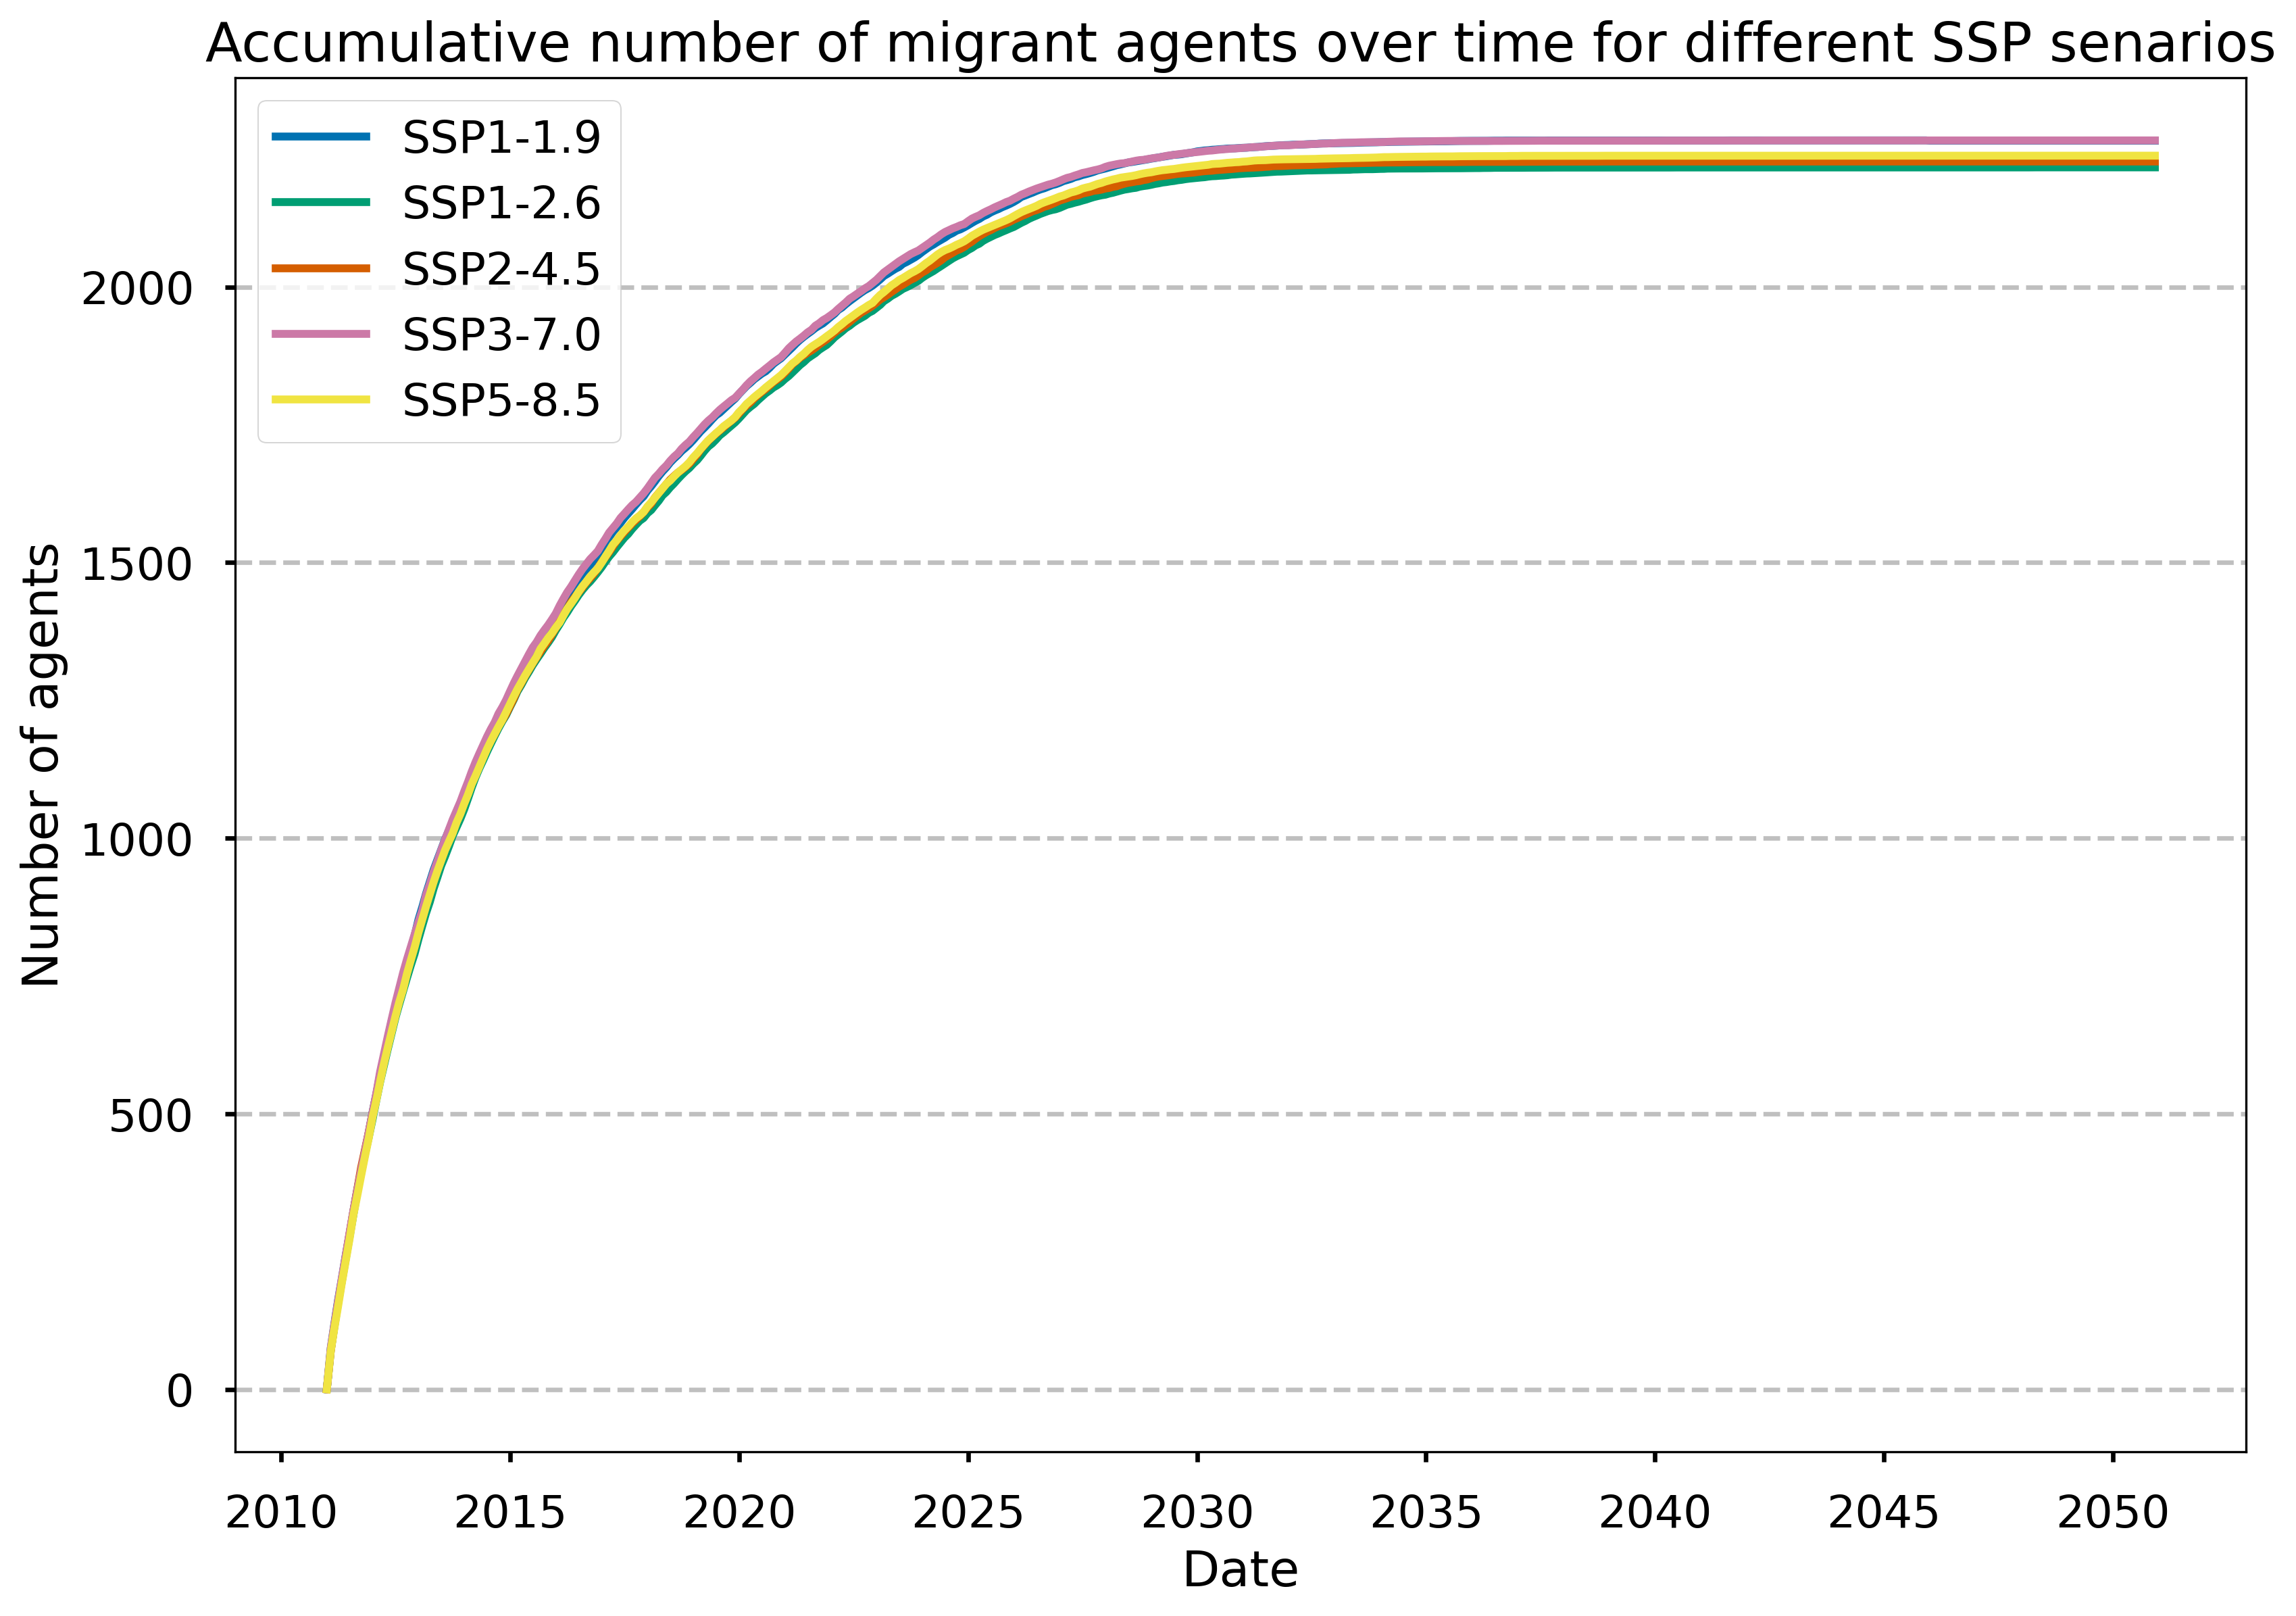

In [41]:
plt.style.use('seaborn-v0_8-colorblind')

mig_sum_119=pd.read_excel('Summed_migrants_SSP119.xlsx')
mig_sum_126=pd.read_excel('Summed_migrants_SSP126.xlsx')
mig_sum_245=pd.read_excel('Summed_migrants_SSP245.xlsx')
mig_sum_370=pd.read_excel('Summed_migrants_SSP370.xlsx')
mig_sum_585=pd.read_excel('Summed_migrants_SSP585.xlsx')

plt.plot(mig_sum_119['date'],mig_sum_119['migrations'],label='SSP1-1.9')
plt.plot(mig_sum_126['date'],mig_sum_126['migrations'],label='SSP1-2.6')
plt.plot(mig_sum_245['date'],mig_sum_245['migrations'],label='SSP2-4.5')
plt.plot(mig_sum_370['date'],mig_sum_370['migrations'],label='SSP3-7.0')
plt.plot(mig_sum_585['date'],mig_sum_585['migrations'],label='SSP5-8.5')

# plt.xlim(pd.to_datetime('2020-11-30 00:00:00'),pd.to_datetime('2050-01-01 00:00:00'))

plt.title('Accumulative number of migrant agents over time for different SSP senarios')
plt.xlabel('Date')
plt.ylabel('Number of agents')

plt.legend()
# plt.ylim(1800,2500)
plt.grid(axis='y',alpha=.5,c='gray',linestyle='--')
plt.savefig('migrants_over_time.jpg')
plt.show()

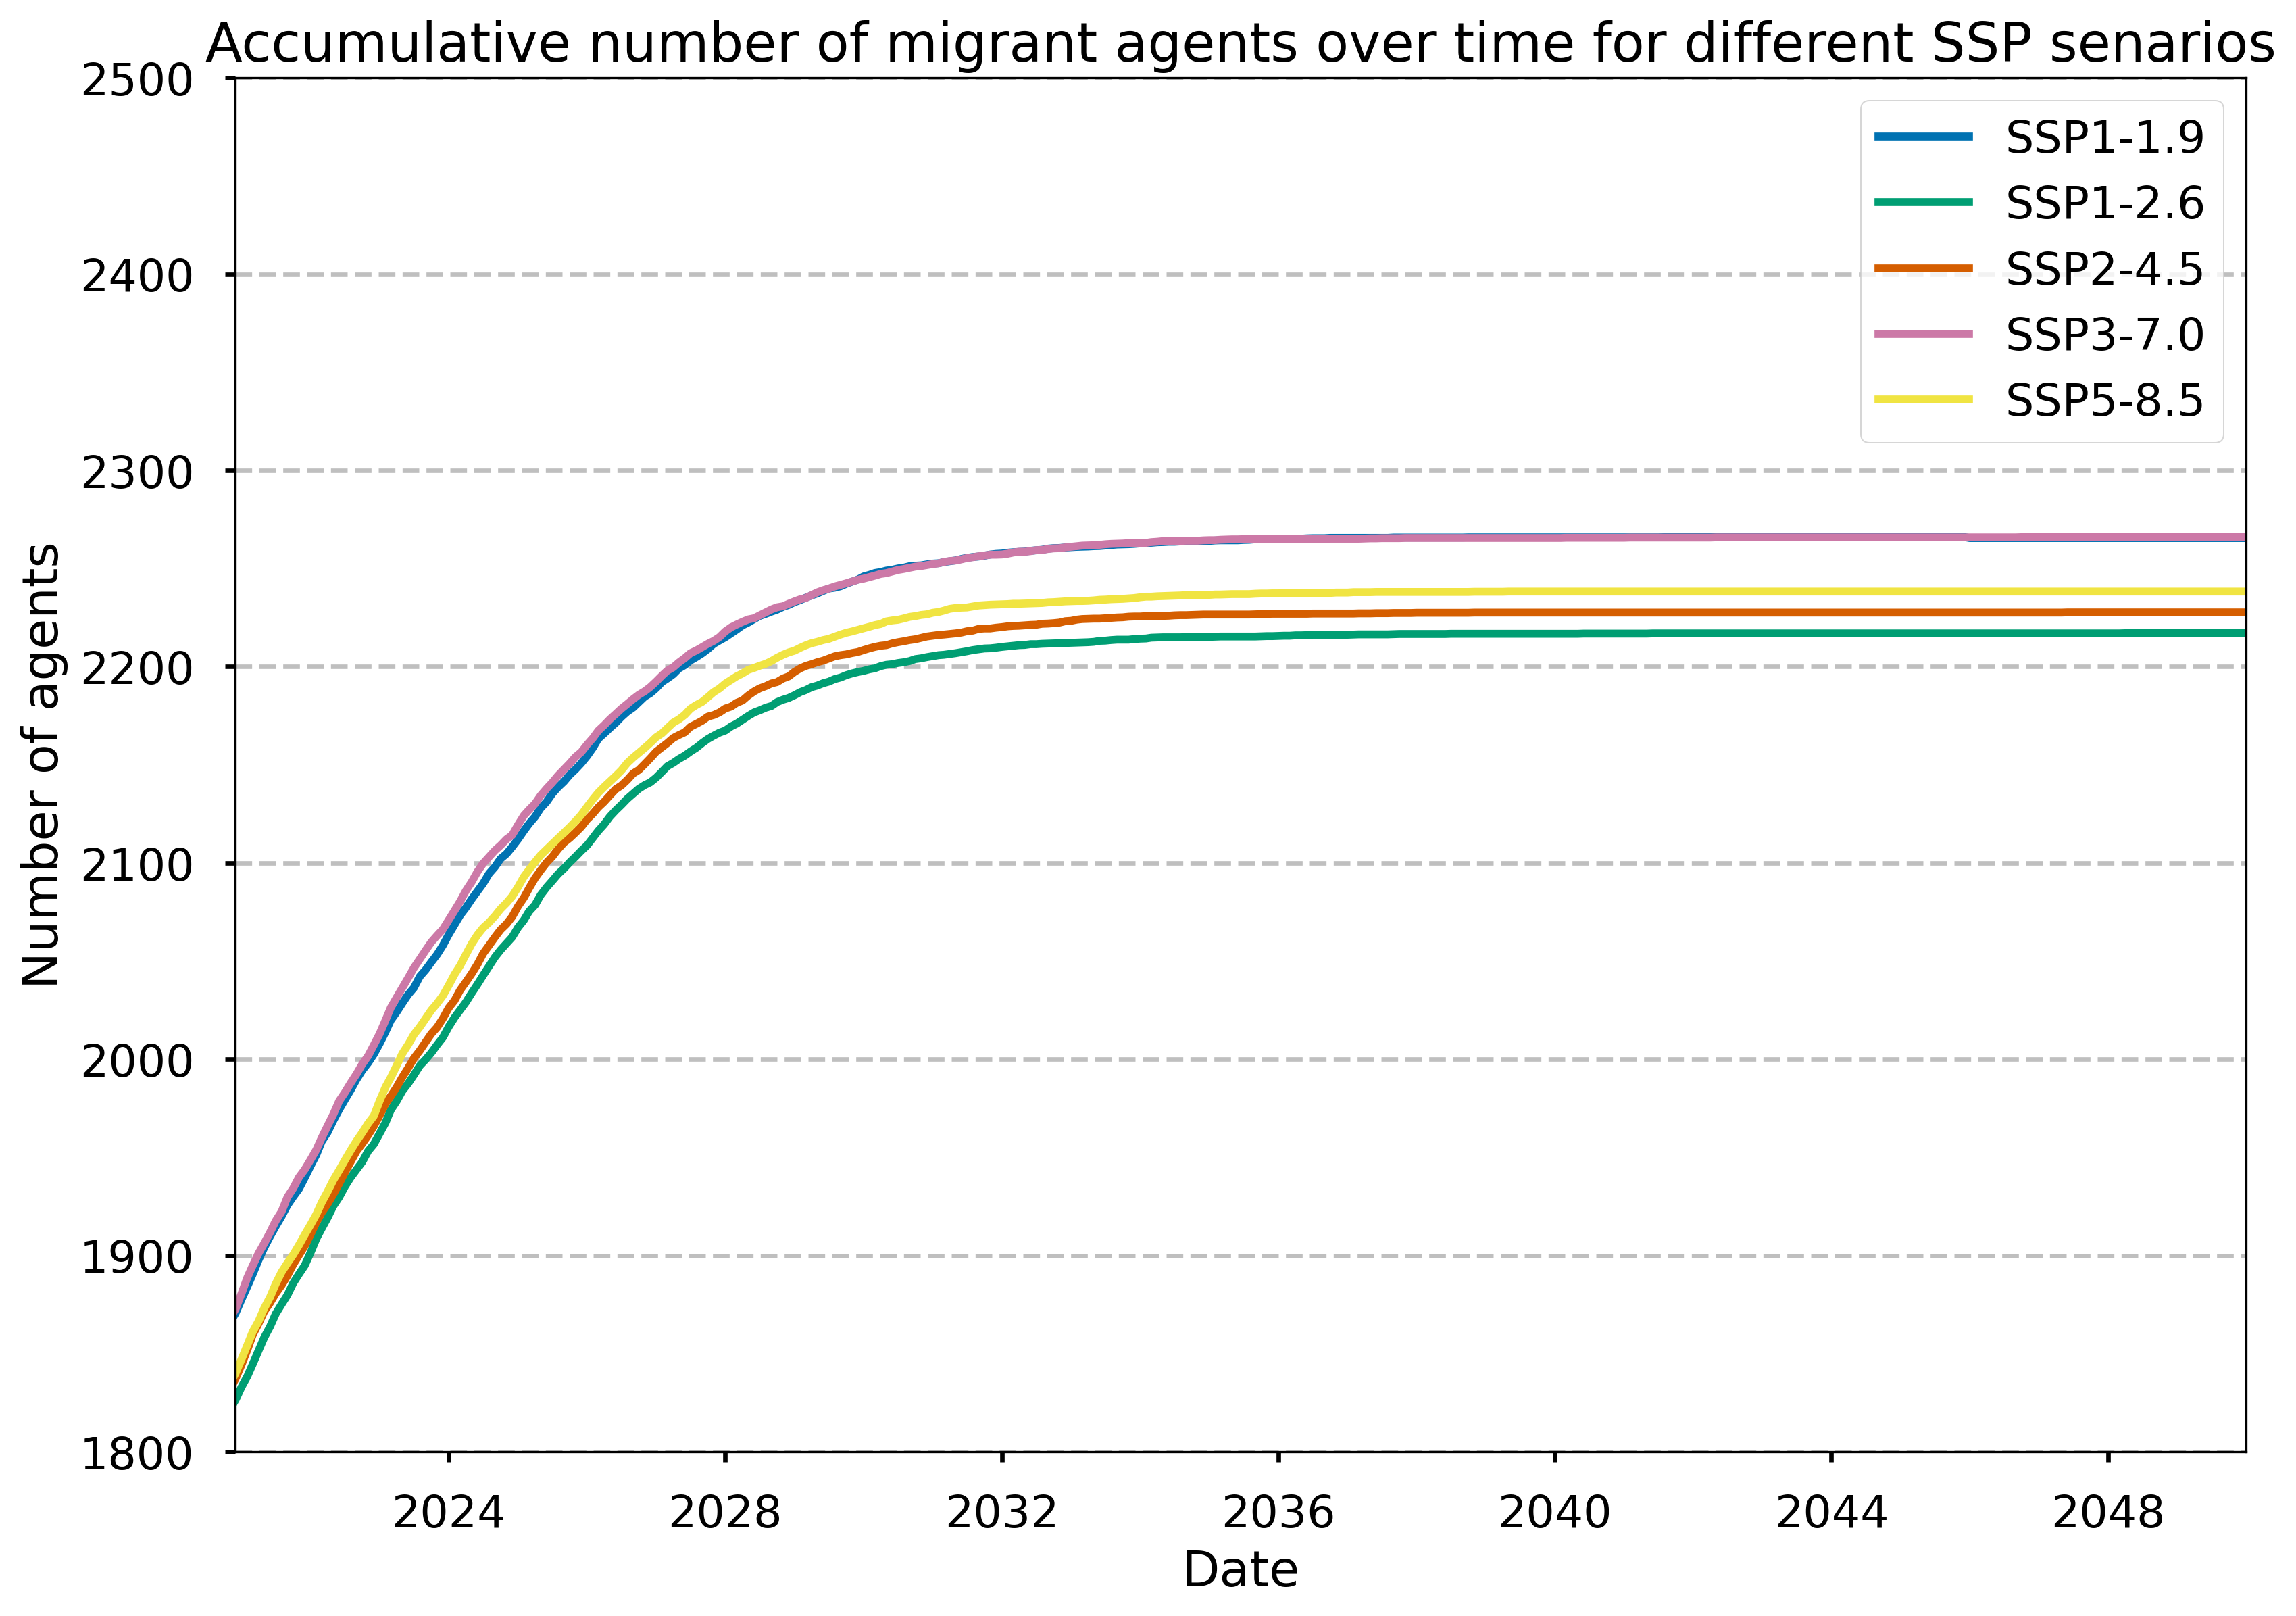

In [42]:
plt.plot(mig_sum_119['date'],mig_sum_119['migrations'],label='SSP1-1.9')
plt.plot(mig_sum_126['date'],mig_sum_126['migrations'],label='SSP1-2.6')
plt.plot(mig_sum_245['date'],mig_sum_245['migrations'],label='SSP2-4.5')
plt.plot(mig_sum_370['date'],mig_sum_370['migrations'],label='SSP3-7.0')
plt.plot(mig_sum_585['date'],mig_sum_585['migrations'],label='SSP5-8.5')

plt.xlim(pd.to_datetime('2020-11-30 00:00:00'),pd.to_datetime('2050-01-01 00:00:00'))

plt.title('Accumulative number of migrant agents over time for different SSP senarios')
plt.xlabel('Date')
plt.ylabel('Number of agents')

plt.legend()
plt.ylim(1800,2500)
plt.grid(axis='y',alpha=.5,c='gray',linestyle='--')
plt.savefig('migrants_over_time_zoomed.jpg')
plt.show()

In [ ]:
mig_sum_119['date'][0]

In [ ]:
pd.to_datetime('2011-01-01 00:00:00')

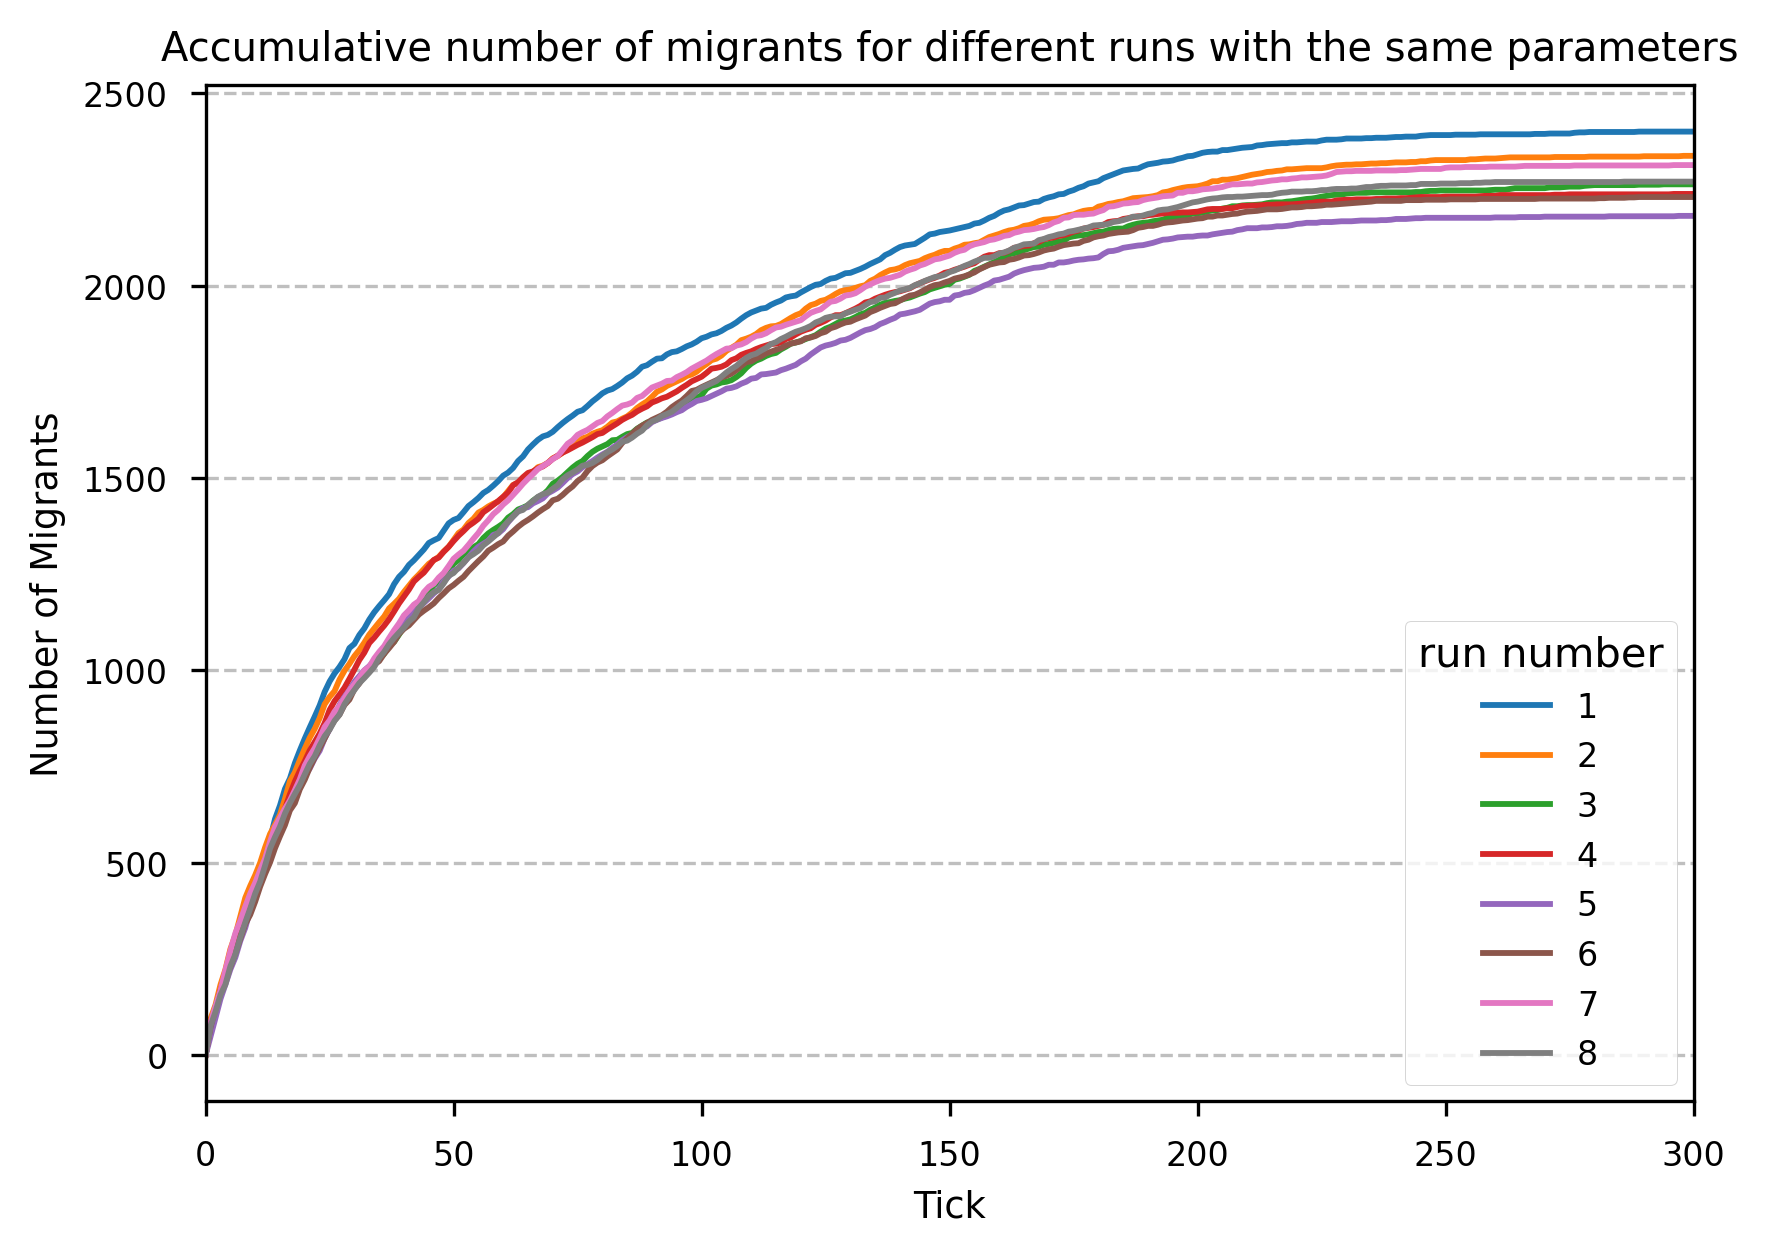

In [17]:
for i in range(1,9):
    df=pd.read_excel(str(i)+'_number_migrants_senario_119_method_hybrid_network_type_random_binary_false.xlsx')

    plt.plot(df['tick'],df['total_mirgrants'],label=str(i))

plt.legend(title='run number')
plt.title('Accumulative number of migrants for different runs with the same parameters')
plt.xlabel('Tick')
plt.ylabel('Number of Migrants')
plt.grid(axis='y',alpha=.5,c='gray',linestyle='--')
plt.xlim(0,300)
plt.savefig('119_no_migrants_different_runs.jpg')
plt.show()

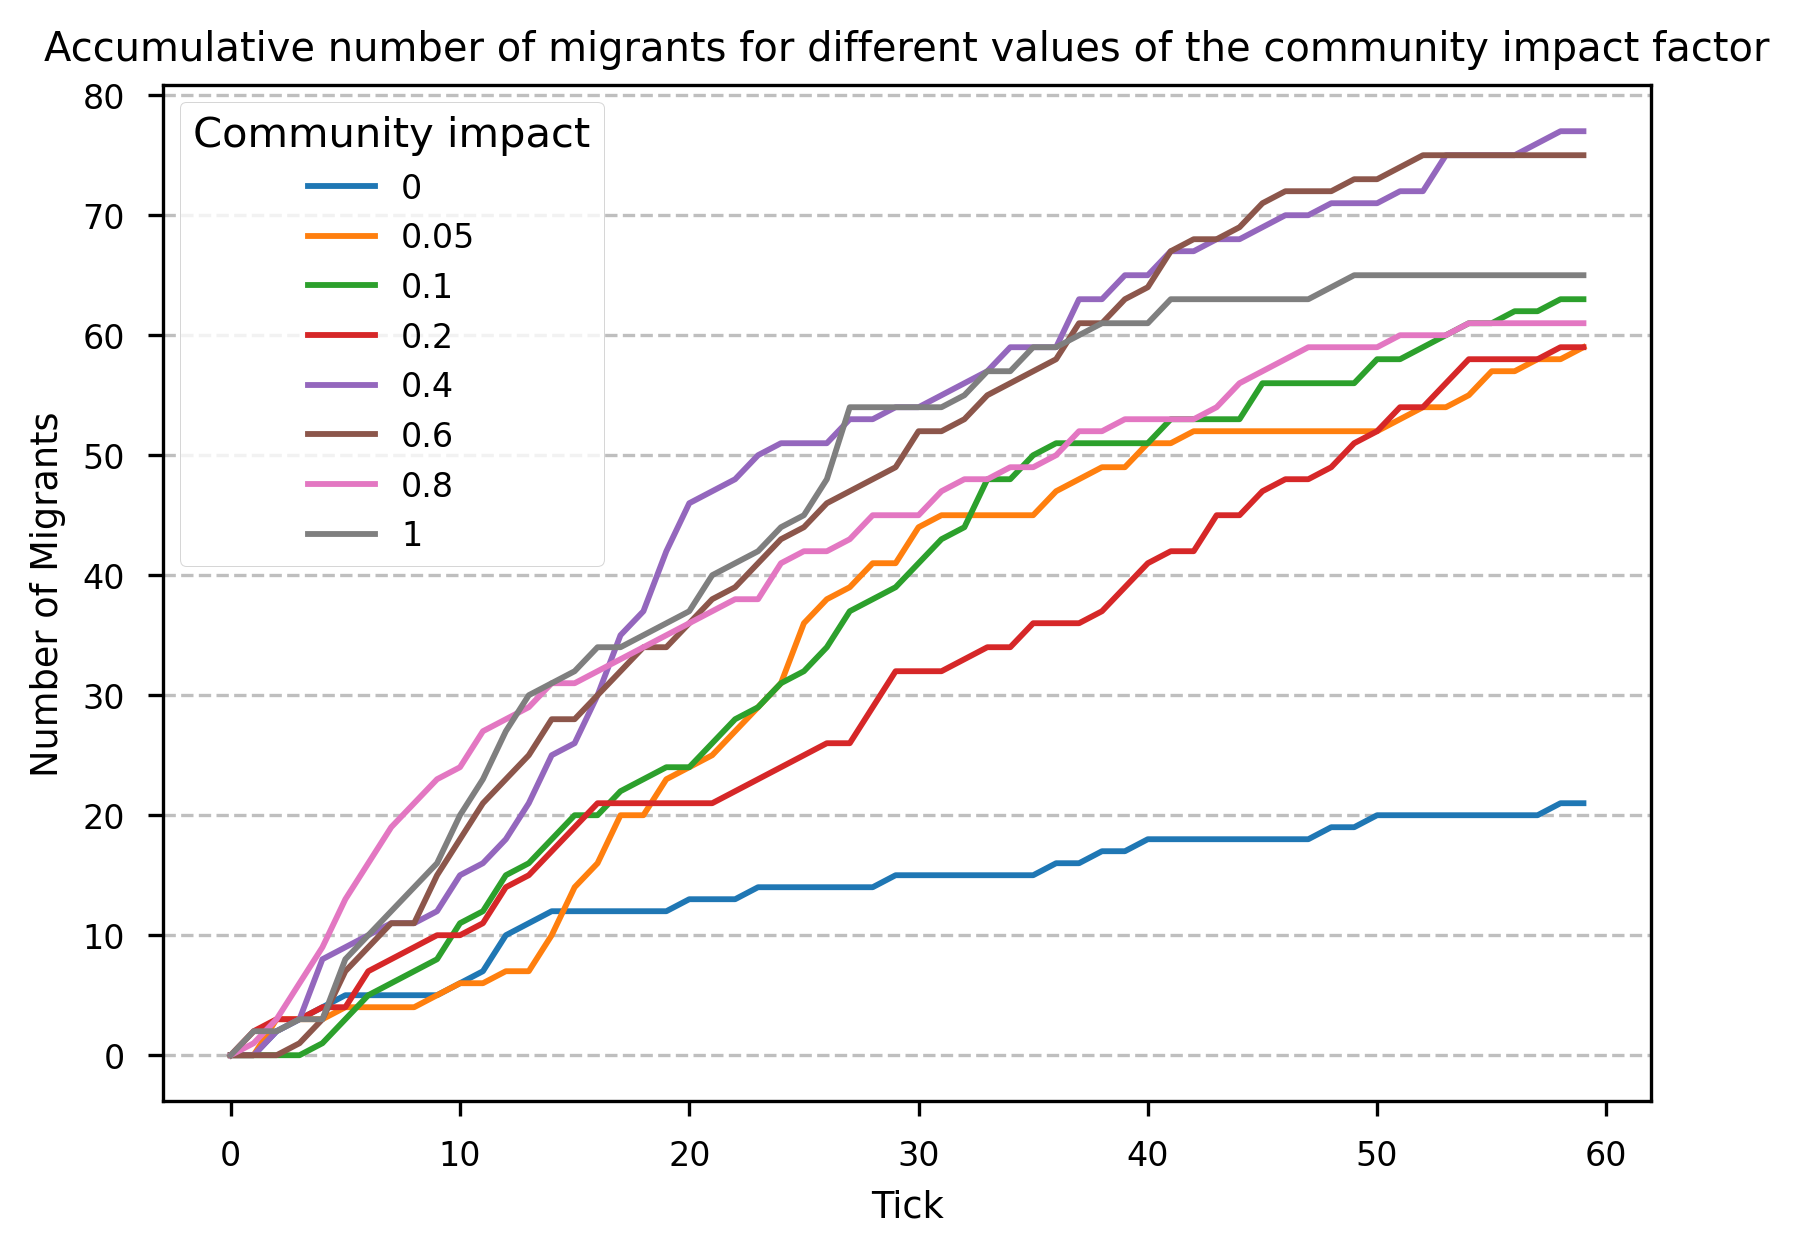

In [15]:
for i in [0,.05,.1,.2,.4,.6,.8,1]:
    df=pd.read_excel('9_number_migrants_senario_119_method_hybrid_network_type_random_com_scale_'+str(i)+'.xlsx')

    plt.plot(df['tick'],df['total_mirgrants'],label=str(i))

plt.legend(title='Community impact')
plt.title('Accumulative number of migrants for different values of the community impact factor')
plt.xlabel('Tick')
plt.ylabel('Number of Migrants')
plt.grid(axis='y',alpha=.5,c='gray',linestyle='--')
plt.savefig('119_no_migrants_different_comm_scale.jpg')
plt.show()

ValueError: Format 'xlsx' is not supported (supported formats: eps, jpeg, jpg, pdf, pgf, png, ps, raw, rgba, svg, svgz, tif, tiff, webp)

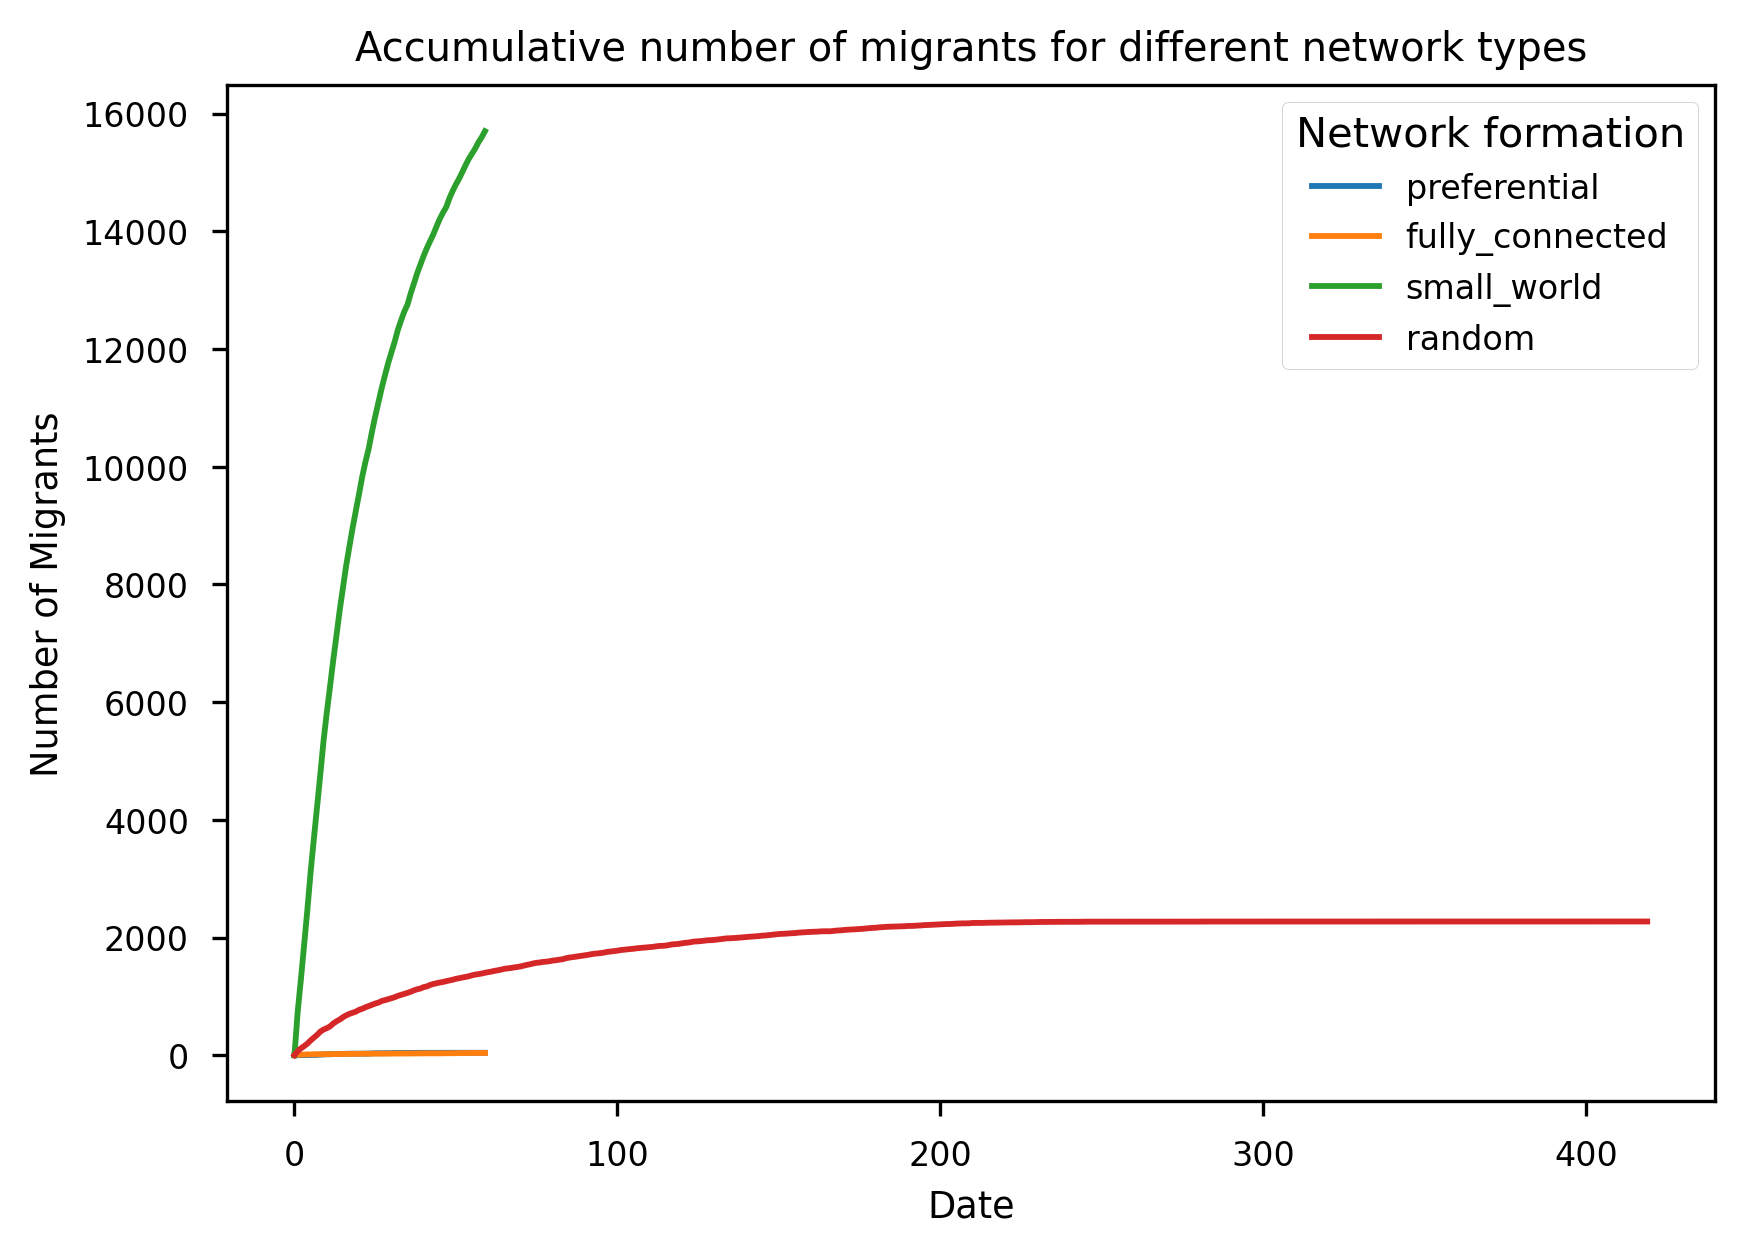

In [6]:
for i in ['preferential','fully_connected','small_world','random']:
    df=pd.read_excel('0_number_migrants_senario_119_method_hybrid_network_type_'+str(i)+'_binary_false.xlsx')

    plt.plot(df['tick'],df['total_mirgrants'],label=str(i))

plt.legend(title='Network formation')
plt.title('Accumulative number of migrants for different network types')
plt.xlabel('Date')
plt.ylabel('Number of Migrants')
plt.savefig('119_no_migrants_different_network.xlsx')
plt.show()

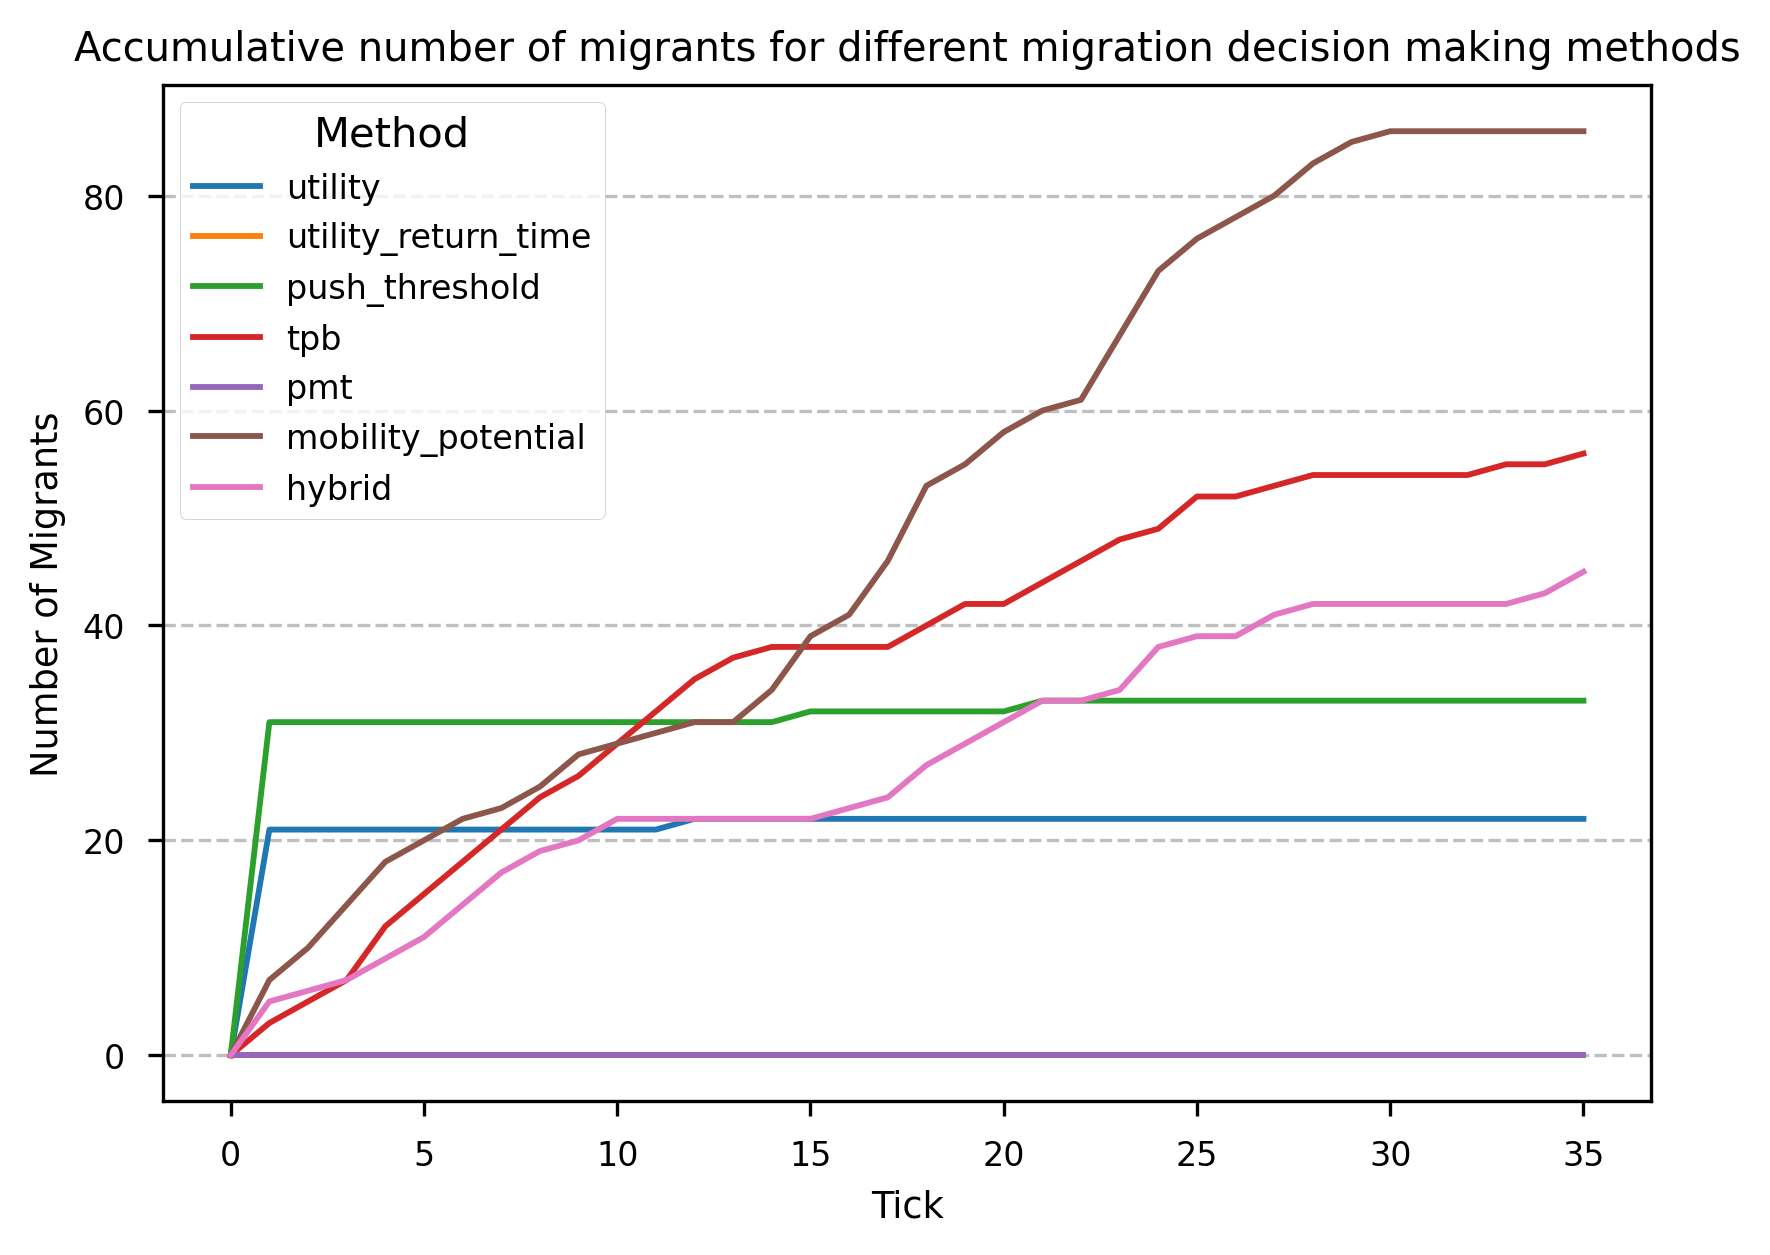

In [14]:
for i in ["utility",'utility_return_time','push_threshold','tpb','pmt','mobility_potential','hybrid']:
    df=pd.read_excel('number_migrants_senario_119_method_'+str(i)+'.xlsx')

    plt.plot(df['tick'],df['total_mirgrants'],label=str(i))

plt.legend(title='Method')
plt.title('Accumulative number of migrants for different migration decision making methods')
plt.xlabel('Tick')
plt.ylabel('Number of Migrants')
plt.grid(axis='y',alpha=.5,c='gray',linestyle='--')
plt.savefig('119_no_migrants_different_decision.jpg')
plt.show()

In [3]:
xl_heatwaves=pd.ExcelFile('averaged_zones_with_heatwaves.xlsx')
xl_cyclones=pd.ExcelFile('averaged_zones_with_cyclones.xlsx')
xl_floods=pd.ExcelFile('averaged_zones_with_floods.xlsx')

combined_data_heatwaves=pd.DataFrame()
combined_data_cyclones=pd.DataFrame()
combined_data_floods=pd.DataFrame()

for ID in xl_heatwaves.sheet_names:
    df=pd.read_excel('averaged_zones_with_heatwaves.xlsx', sheet_name=ID)
    combined_data_heatwaves=pd.concat([combined_data_heatwaves,df],ignore_index=True)
mig_sum_heatwaves = combined_data_heatwaves.groupby(['year', 'month'])['migrations'].sum().reset_index()

for ID in xl_cyclones.sheet_names:
    df=pd.read_excel('averaged_zones_with_cyclones.xlsx', sheet_name=ID)
    combined_data_cyclones=pd.concat([combined_data_cyclones,df],ignore_index=True)
mig_sum_cyclones = combined_data_cyclones.groupby(['year', 'month'])['migrations'].sum().reset_index()

for ID in xl_floods.sheet_names:
    df=pd.read_excel('averaged_zones_with_floods.xlsx', sheet_name=ID)
    combined_data_floods=pd.concat([combined_data_floods,df],ignore_index=True)
mig_sum_floods = combined_data_floods.groupby(['year', 'month'])['migrations'].sum().reset_index()

In [4]:
mig_sum_heatwaves['date'] = pd.to_datetime(mig_sum_heatwaves[['year', 'month']].assign(day=1))
mig_sum_cyclones['date'] = pd.to_datetime(mig_sum_cyclones[['year', 'month']].assign(day=1))
mig_sum_floods['date'] = pd.to_datetime(mig_sum_floods[['year', 'month']].assign(day=1))

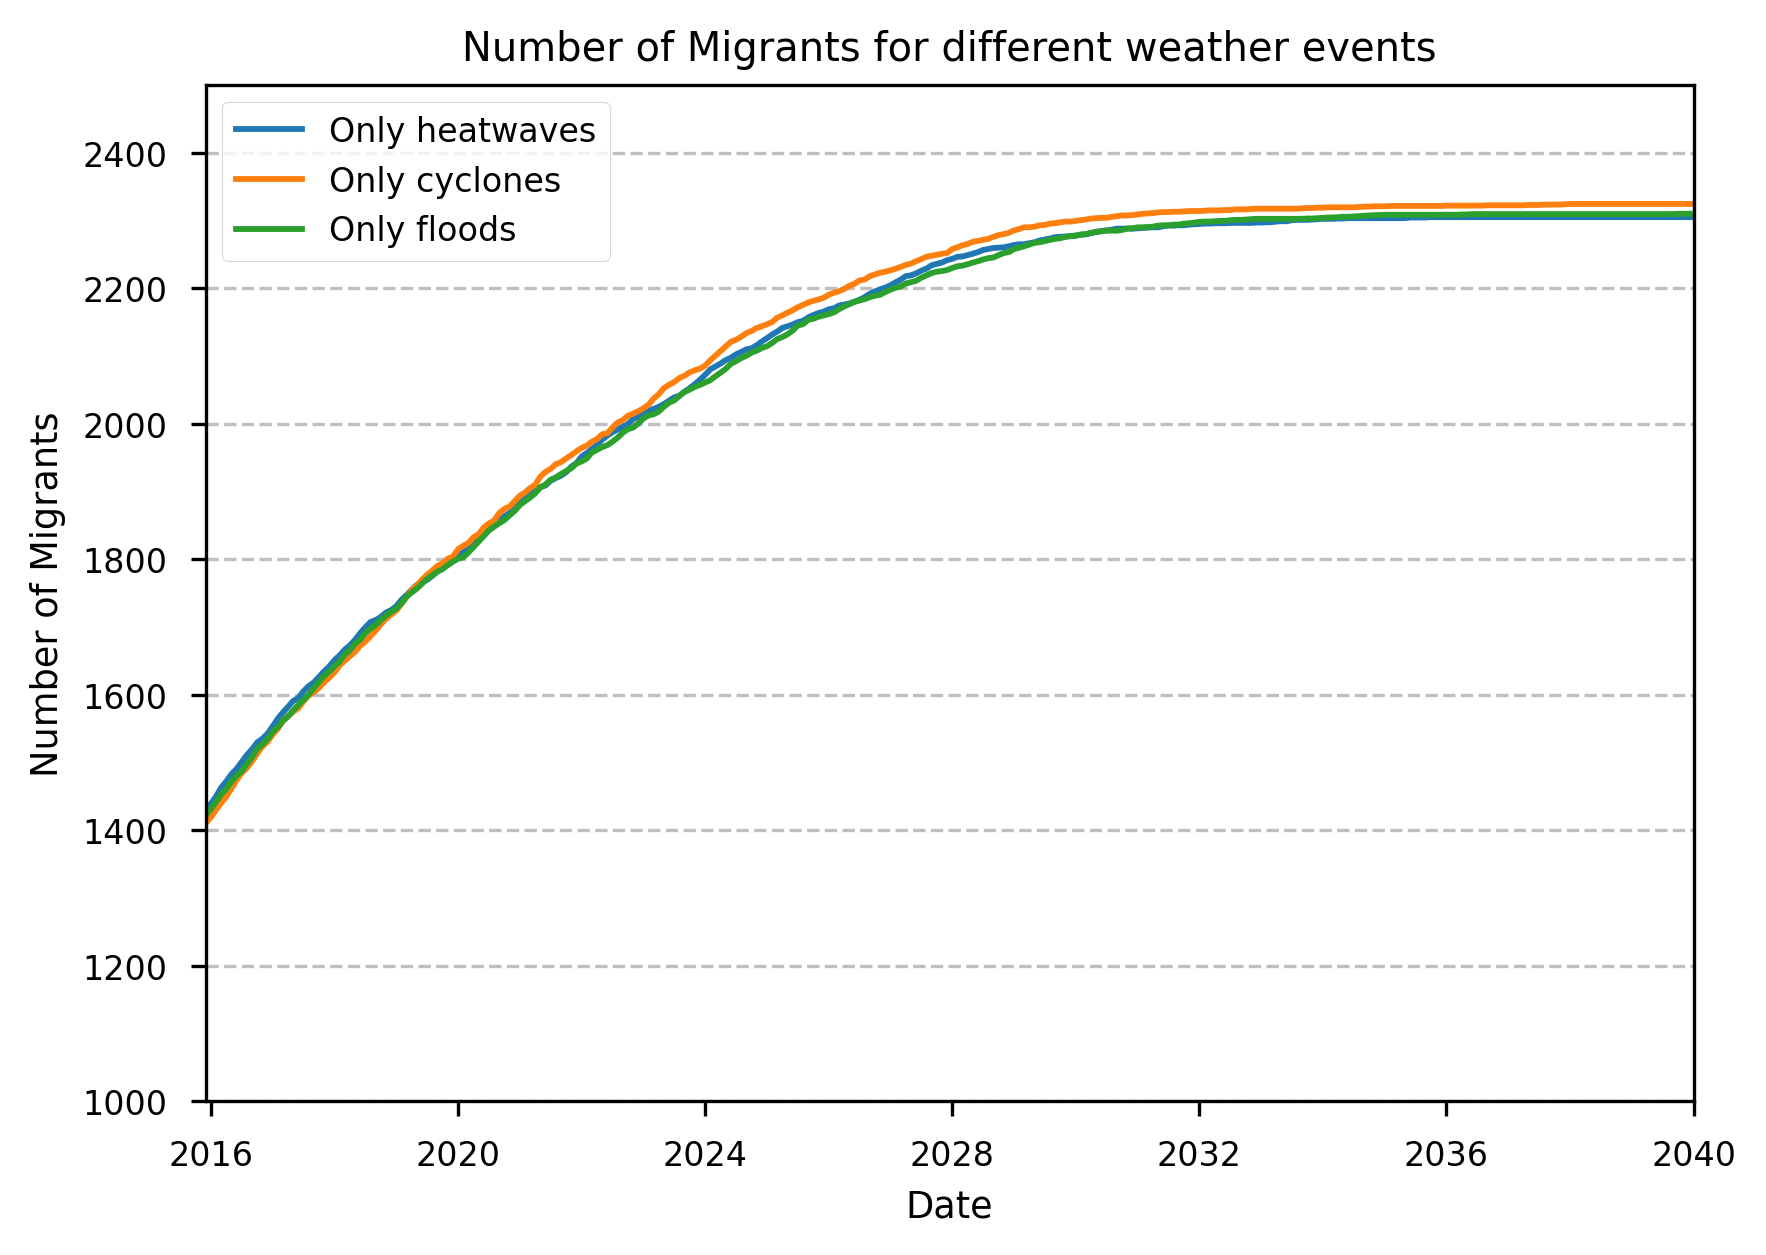

In [20]:
# plt.plot(mig_sum_119['date'][:360],mig_sum_119['migrations'][:360],label='SSP1-1.9')
# plt.plot(mig_sum_119['date'][:360],mig_sum_585['migrations'][:360],label='SSP5-8.5')
plt.plot(mig_sum_119['date'][:360],mig_sum_heatwaves['migrations']*10,label='Only heatwaves')
plt.plot(mig_sum_119['date'][:360],mig_sum_cyclones['migrations']*10,label='Only cyclones')
plt.plot(mig_sum_119['date'][:360],mig_sum_floods['migrations']*10,label='Only floods')

plt.grid(axis='y',alpha=.5,c='gray',linestyle='--')
plt.title('Number of Migrants for different weather events')
plt.xlabel('Date')
plt.ylabel('Number of Migrants')

plt.xlim(pd.to_datetime('2015-11-30 00:00:00'),pd.to_datetime('2040-01-01 00:00:00'))
plt.ylim(1000,2500)

plt.legend()
plt.show()